In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/fraudTrain.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

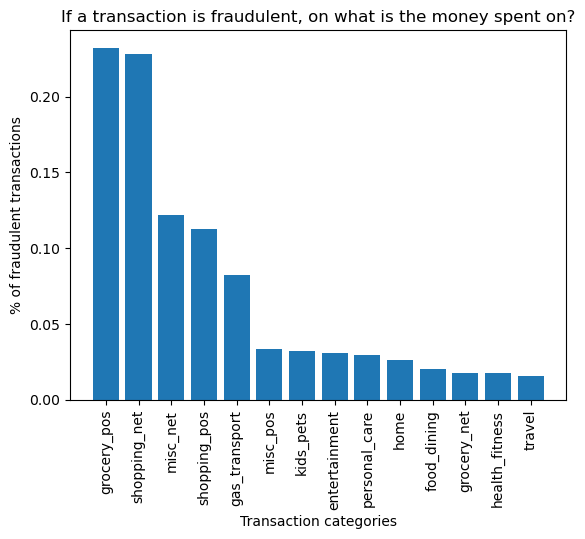

The avarage fraudulent transaction is made in amout of 531.32$


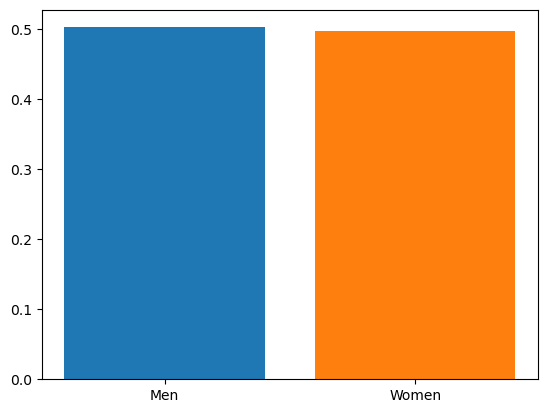

Men and women are equaly as likely to fall victim to creditcard fraud


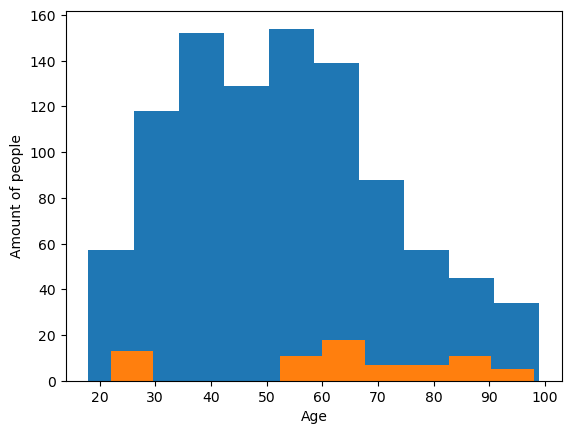

Most of the people who fall victim to credit card fraud are over 50 years of age


In [7]:
import matplotlib.pyplot as plt
from datetime import datetime

data.head()
## In which category the most fraud occurs
fraud_by_category=data[(data['is_fraud']==1)]['category'].value_counts(normalize=True)

## The avg amount of money that is related to a single fraudulent transaction
fraud_by_amount=data[(data['is_fraud']==1)]['amt'].describe()

plt.bar(x=fraud_by_category.index, height=fraud_by_category.values)
plt.xticks(rotation=90)
plt.title("If a transaction is fraudulent, on what is the money spent on?")
plt.xlabel("Transaction categories")
plt.ylabel("% of fraudulent transactions")
plt.show()

print("The avarage fraudulent transaction is made in amout of "+str(round(fraud_by_amount[1],2))+"$")


fraud_by_gender = data[(data['is_fraud']==1)]['gender'].value_counts(normalize=True)
plt.bar(x='Men',height=fraud_by_gender['M'])
plt.bar(x='Women',height=fraud_by_gender['F'])
plt.show()
print("Men and women are equaly as likely to fall victim to creditcard fraud")


##Creating age from date of birth
data['dob']= pd.to_datetime(data['dob'])
current_date= datetime.now()

data['age_in_years']= (current_date-data['dob']).astype('<m8[Y]')
data['age_in_years'] = data['age_in_years'].map(lambda x: int(x))


##Creating full name, assuming all full names are unique
data['full_name'] = data['first'] + '_' + data['last']
unique_rows = data.drop_duplicates(subset='full_name')

age = unique_rows['age_in_years'].value_counts()
## victims
vic = unique_rows[(unique_rows['is_fraud']==1)].drop_duplicates(subset='full_name')



plt.hist(unique_rows['age_in_years'],bins=10)
plt.hist(vic['age_in_years'], bins=10)
plt.xlabel("Age")
plt.ylabel("Amount of people")

plt.show()

print("Most of the people who fall victim to credit card fraud are over 50 years of age")


In [8]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age_in_years
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.967301e+01
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,1.738701e+01
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.800000e+01
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,3.600000e+01
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.800000e+01
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.100000e+01
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.900000e+01


In [21]:
print(len(data['category'].unique()))
print(len(data['job'].unique()))
data.head()

14
494


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age_in_years,full_name
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35,Jennifer_Banks
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45,Stephanie_Gill
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61,Edward_Sanchez
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56,Jeremy_White
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37,Tyler_Garcia


In [28]:
## Finding out how many different categorical values exist in columns

## Unique jobs positions in the dataset
print("Different unique jobs: "+ str(len(data['job'].unique())))

print("Different unique transaction categories: "+ str(len(data['category'].unique())))

print("Unique merchants: "+str(len(data['merchant'].unique())))

print("Unique credit card numbers: "+str(len(data['cc_num'].unique())))

print("Unique states: "+str(len(data['state'].unique())))

print("Unique cities: "+str(len(data['city'].unique())))

print("% of fraudulent transactions in the dataset: "+str(len(data[(data['is_fraud']==1)])/len(data)), "which is in total: "+str(len(data[(data['is_fraud']==1)])), "transactions")

Different unique jobs: 494
Different unique transaction categories: 14
Unique merchants: 693
Unique credit card numbers: 983
Unique states: 51
Unique cities: 894
% of fraudulent transactions in the dataset: 0.005788651743883394 which is in total: 7506 transactions


SyntaxError: positional argument follows keyword argument (2162719307.py, line 1)